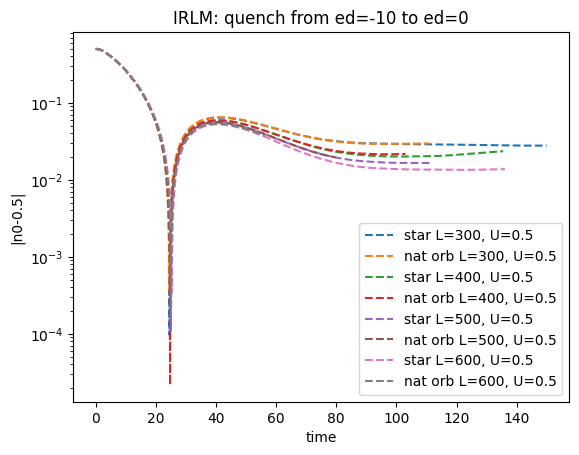

In [118]:
import matplotlib.pyplot as plt
import numpy as np

plt.title("IRLM: quench from ed=-10 to ed=0")
plt.xlabel("time")
plt.ylabel("|n0-0.5|")
plt.yscale("log")

for L in [300,400,500,600]:#[100,200,300,400]:   #100,101,200,202,300,203]:
    n01=np.loadtxt(f"tdvp_chain/L{L}/irlm_star_L{L}.txt", skiprows=1)
    n02=np.loadtxt(f"tdvp_star/L{L}/irlm_star_L{L}.txt", skiprows=1)
    #n03_ok=np.loadtxt(f"tdvp_no2/L{L}/irlm_no_L{L}.txt", skiprows=1)
    n03=np.loadtxt(f"tdvp_no3/L{L}/irlm_no_L{L}.txt", skiprows=1)
    #ns2=np.loadtxt(f"tdvp_star2/L{L}/irlm_star1_L{L}.txt", skiprows=2)
    #n03_1=np.loadtxt(f"tdvp_no/L{L}/irlm_no_L{L}_1.txt", skiprows=1)
    #plt.plot(n01[:,0],[abs(x-0.5) for x in n01[:,3]], '-', label=f"chain L={L}, U=0.5")
    plt.plot(n02[:,0],[abs(x-0.5) for x in n02[:,3]], '--', label=f"star L={L}, U=0.5")
    #plt.plot(n03_ok[:,0],[abs(x-0.5) for x in n03_ok[:,4]], '--', label=f"nat orb ok L={L}, U=0.5")
    plt.plot(n03[:,0],[abs(x-0.5) for x in n03[:,4]], '--', label=f"nat orb L={L}, U=0.5")
    #plt.plot(n03_1[:,0],[abs(x-0.5) for x in n03_1[:,4]], '--', label=f"nat orb L={L}, U=0.5 with cutoff")
    #plt.plot(ns2[:,0],[abs(x-0.5) for x in ns2[:,3]], '--', label=f"star2 L={L}, U=0.5")
    
plt.legend()

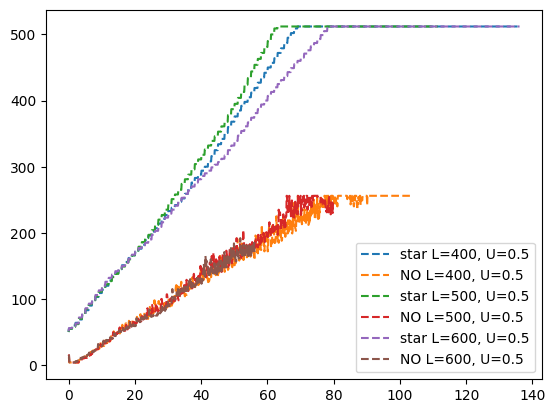

In [119]:
c=0
for L in [400,500,600]:#[100,200,300,400,500,600]:   #100,101,200,202,300,203]:
    c=c+1
    n01=np.loadtxt(f"tdvp_chain/L{L}/irlm_star_L{L}.txt", skiprows=1)
    n02=np.loadtxt(f"tdvp_star/L{L}/irlm_star_L{L}.txt", skiprows=1)
    n03=np.loadtxt(f"tdvp_no3/L{L}/irlm_no_L{L}.txt", skiprows=1)
    #plt.plot(n01[:,0],n01[:,1], '-', label=f"chain L={L}, U=0.5")
    plt.plot(n02[:,0],n02[:,1], '--', label=f"star L={L}, U=0.5")
    plt.plot(n03[:,0],n03[:,2], '--', label=f"NO L={L}, U=0.5")
plt.legend()

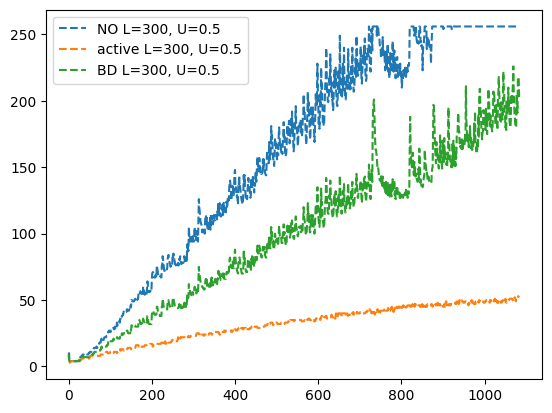

In [111]:
for L in [300]:#[100,200,300,400,500,600]:   #100,101,200,202,300,203]:

    n03=np.loadtxt(f"tdvp_no3/L{L}/irlm_no_L{L}.txt", skiprows=1)
    plt.plot(n03[:,2], '--', label=f"NO L={L}, U=0.5")
    
    n03=np.loadtxt(f"tdvp_no3/L{L}/new{L}.dat", skiprows=0)
    #plt.plot(n01[:,0],n01[:,1], '-', label=f"chain L={L}, U=0.5")
    plt.plot(n03, '--', label=f"active L={L}, U=0.5")
    
    n03=np.loadtxt(f"tdvp_no3/L{L}/BD{L}.dat", skiprows=0)
    #plt.plot(n01[:,0],n01[:,1], '-', label=f"chain L={L}, U=0.5")
    bd=[np.max(n03[i,:]) for i in range(len(n03))]
    plt.plot(bd, '--', label=f"BD L={L}, U=0.5")
plt.legend()

In [103]:
np.load(f"tdvp_no3/L{L}/new.dat")

ValueError: Cannot load file containing pickled data when allow_pickle=False